In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from keras.models import load_model
import numpy as np
from predict import img_preprocess


2024-03-04 13:29:03.545446: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 13:29:04.057149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 13:29:04.057445: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 13:29:04.153523: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 13:29:04.343600: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 13:29:04.347393: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
model = load_model('artifacts/Model:Birds_multiclassification.h5')

2024-03-04 13:29:07.947522: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 177209344 exceeds 10% of free system memory.
2024-03-04 13:29:08.017725: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 177209344 exceeds 10% of free system memory.
2024-03-04 13:29:08.064213: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 177209344 exceeds 10% of free system memory.
2024-03-04 13:29:09.130199: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 177209344 exceeds 10% of free system memory.
2024-03-04 13:29:09.319971: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 177209344 exceeds 10% of free system memory.


In [3]:
# Create a new model to access intermediate outputs
intermediate_layer_model = Model(inputs=model.input, outputs=[model.get_layer('conv2d').output, model.get_layer('conv2d_1').output, model.get_layer('conv2d_2').output])

# Compile the new model (needed for prediction)
intermediate_layer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:

def feature_map(img_path):
    # Predict using the new model (replace with your image preprocessing logic)
    image = img_preprocess(img_path)  
    intermediate_outputs = intermediate_layer_model.predict(image)

    # Access and reshape feature maps
    first_feature_map = intermediate_outputs[0][0]  # Assuming first layer and first image in batch
    second_feature_map = intermediate_outputs[1][0]
    third_feature_map = intermediate_outputs[2][0]

    # Plot the feature maps
    plt.figure(figsize=(10, 5))

    plt.subplot(3, 1, 1)
    plt.imshow(first_feature_map[:,:,0])
    plt.title('First Convolutional Layer - Feature Map 1')
    plt.axis('off')

    plt.subplot(3, 1, 2)
    plt.imshow(second_feature_map[:,:,0])
    plt.title('Second Convolutional Layer - Feature Map 2')
    plt.axis('off')

    plt.subplot(3, 1, 3)
    plt.imshow(third_feature_map[:,:,0])
    plt.title('Third Convolutional Layer - Feature Map 3')
    plt.axis('off')

    plt.show()


1/1 [==============================] - 0s 468ms/step


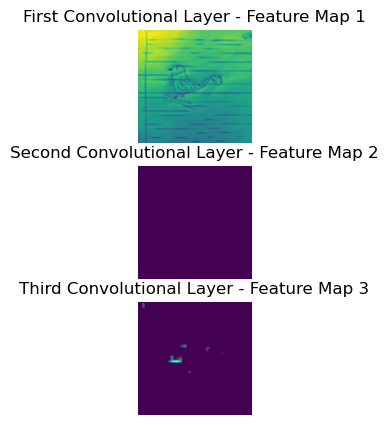

In [5]:
feature_map('429476244_398611986473905_8834481449261759076_n.jpg')

1/1 [==============================] - 0s 28ms/step


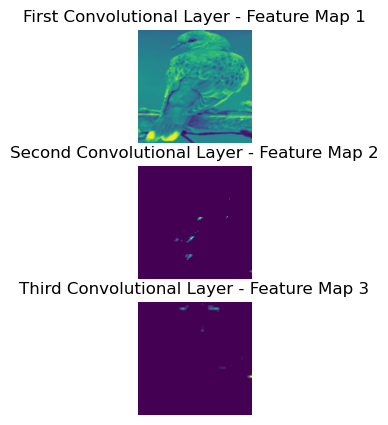

In [28]:
feature_map('artifacts/dataset/test/EUROPEAN TURTLE DOVE/2.jpg')

1/1 [==============================] - 0s 93ms/step


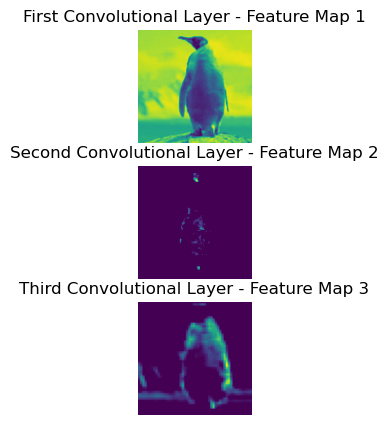

In [8]:
feature_map('Screenshot from 2024-03-04 13-30-57.png')